
# Support Vector Machine

## References 

* https://en.wikipedia.org/wiki/Dot_product
* https://www.cs.cornell.edu/courses/cs4780/2022fa/lectures/lecturenote09.html
* https://mlguidebook.com/en/latest/perceptron/explore.html
* https://en.wikipedia.org/wiki/Support_vector_machine
* convex optimization docs http://cvxopt.org/, https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style

plt.style.use("fivethirtyeight")

%matplotlib inline

## Assumptions

* Binary Classification y = {-1, 1}
* Data is linearly Separable


## Concept

![hyperplane](./hyperplane.drawio.svg)

* Defining a linear classifier \begin{align*}
    h(x) = sign(w^T x + b)
\end{align*}

* binary classification with labels -1 and +1
* Typically data is linearly separable and there exist a plane with dimension n - 1 (where n is dimenstion of column space). This plane is defined by `Maximum Margin Hyperplane`
* As perceptron also creates a hyperplane between the classes to linearly separate them. but it is needed to create a hyperplane that is optimum.
* In above diagram we can see 3 hyperplanes. hyperplane 2 and 3 also separates the classes, but the test data point is wrongly classified with hyperplane 2's scenario. In essence, explaining that plane 2 and 3 are not generalized or optimum solutions.
<!-- * only one vs rest -->


### Maximum Margin Hyperplane

* The plane maximizing the distance to the closest point from both classes
* Hyperplane is good if it maximizes the margin (which is minimum distance from both classes)

## Margin

Hyperplane is defined by $\vec{w}$ as

\begin{align}
    \mathcal{H} &= \{x | w^T x + b = 0\}
\end{align}

![margin](./margin.drawio.svg)

Let $\gamma$ be the minimum distance from the hyperplane and closest point from both classes

\begin{align}
    \vec{x_p} &= \vec{x} - \vec{d} \\
    w^T x_p + b &= 0 \text{ point on the hyperplane }\\
    w^T ( \vec{x} - \vec{d} ) + b &= 0\\ \\
    \vec{d} &= \alpha \vec{x}  && \because \text{ d is rescaled vector of w} \\ \\
    w^T ( \vec{x} - \alpha \vec{w} ) + b &= 0\\
    \Rightarrow \alpha &= \frac{w^T x + b}{w^T w}\\ \\
    \vec{d} &= \frac{w^T x + b}{w^T x} . \vec{x}\\
    ||d||_2 &= \sqrt{d^T d} = \sqrt{\alpha^2 w^T w}\\
    &= \alpha \sqrt{w^T w} = \frac{w^T x + b}{w^T x} \sqrt{w^T w}\\
    ||d||_2 &= \frac{w^T x + b}{\sqrt{w^T w}}\\
    ||d||_2 &= \frac{w^T x + b}{||w||_2}\\ \\
    \text{margin } \gamma(w, b) &= {min\atop{x \in D}} \frac{w^T x + b}{||w||_2}
\end{align}

## Algorithm
Now according to the definition of maximum margin classifier 

\begin{align}
    {max\atop{w, b}}  \gamma(w, b)\\
\end{align}

But there is a problem with this definition as if we just want to increase the margin it can be anywhere (like $\infty$ )

This means we need to constraint the hyperplane to be between the classes or the plane of data (necessarily)

Now

\begin{align}
    {max\atop{w, b}} \gamma(w,b) && \forall i : y_i (w^T x_i + b) \geq 0
\end{align}

we added constraint to  make sure the hyperplane is between the classes

as we know $y \in \{-1, 1\}$

if $w^T x + b = -1$ and correctly classified then $-1 \times -1 = 1$ and for label 1 as well.

if we move forward with this, then

\begin{align}
    {max\atop{w, b}} \big[ {min\atop{x \in D}} \frac{|w^T x + b|}{w^ T w} \big] && \forall i : y_i (w^T x_i + b) \geq 0 \\ \\
    {max\atop{w, b}} \frac{1}{w^T w} \big[ {min\atop{x \in D}} |w^T x + b| \big] && \forall i : y_i (w^T x_i + b) \geq 0
\end{align}



![margin2](./margin2.drawio.svg)


\begin{align}
    H &= \{ x : w^T x + b = 0\}
\end{align}

`Special Trick`
If we rescale the value of w and b to any positive value then the result is going to be the same (means there is no unique solution)



\begin{align}
    {max\atop{w, b}} \frac{1}{w^T w} \big[ {min\atop{x \in D}} |w^T x + b| \big] 
    \\ \\ \forall i : y_i (w^T x_i + b) \geq 0 \\ \\ {\min\atop{x \in D}} | w^T x + b | = 1
\end{align}

Minimum margin value is 1. There exist a solution possible where minimum  arging is 1.

\begin{align}
    {min\atop{w, b}} w^T w && \forall i: y_i(w^T x_i + b) \geq 0 \\ && {min\atop{x \in D}} | w^T x + b | = 1 \\ \\
    & \Updownarrow \\ \\
     {min\atop{w, b}} w^T w && \forall i: y_i(w^T x_i + b) \geq 1
\end{align}

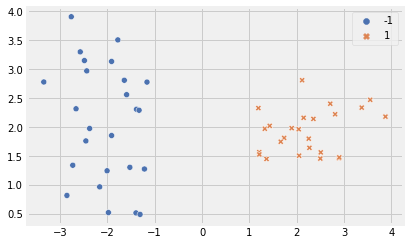

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=50, n_features=2, n_redundant=0, n_classes=2, class_sep=2,
                           n_clusters_per_class=1, random_state=666)

y = np.where(y == 0, 1, -1) # to change classes from 0,1 to -1,1

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax, palette='deep')
plt.show()

In [4]:
n_samples, n_features = X.shape
w = np.zeros((n_features))
b = 0

while True:
    m = 0
    for i in range(n_samples):
        if (y[i] * (w.T @ X[i]) + b) >= 1: # misclassification
            w = w + (y[i] * X[i])
            m = m + 1

    ## if this loop was while(infinite) then when the classifier perfectly fits
    ## 0 misclassifications
    ## then m = 0 and it will break the loop
    if m == 0:
        break

In [5]:
y_pred = np.int32(np.sign(w @ X.T))

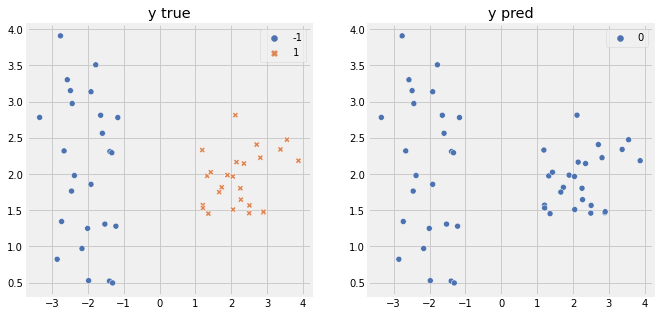

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax, palette='deep')
ax.set_title("y true")

ax = fig.add_subplot(1,2,2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, style=y_pred, ax=ax, palette='deep')
ax.set_title("y pred")

plt.show()